#**Analysis of electrical power consumption for individual households**

**Name**: Pavan Prahlad Galagali   
**Email**: pgala001@odu.edu   
**Portfolio**: https://www.cs.odu.edu/~pgalagal/   


## **Abstract:**
**Dataset Title: Individual household electric power consumption Data Set**    
**URL: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption**   

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).   

**Notes**:  
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.   
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Problem Statement:**: Use of time series data by performing regression and clustering to detect correlation among time, voltage imbalance, waste power and the energy usage for different types of appliances used in a household.

**Data Set Information:** 

Number of instances: 2075259   
Number of Attributes: 9  
Data Set Characteristics: Multivariate, Time-Series   
Attribute Characteristics: Real    
Associated Tasks: Regression, Clustering  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
sns.set_theme()
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
import pandas_profiling
%matplotlib inline

## **1.Data Preparation**



**Steps taken:**

>**Merged two columns 'Date' and 'Time' to 'DateTime'.**


> **Converted the data to time-series type by taking index to be the time**


>**The data includes 'nan' and '?' as a string. Converted both to numpy nan in importing stage and treated both of them the same**







###**1.1.Data Importing**

In [ ]:
energy_df=pd.read_csv("/content/drive/My Drive/DS_data/household_power_consumption.txt",sep=";",
                      parse_dates={'DateTime' : ['Date', 'Time']}, infer_datetime_format=True,low_memory=False,
                      index_col='DateTime',na_values=['nan','?'])

In [ ]:
energy_df.head()

Global_active_power  ...  Sub_metering_3
DateTime                                  ...                
2006-12-16 17:24:00                4.216  ...            17.0
2006-12-16 17:25:00                5.360  ...            16.0
2006-12-16 17:26:00                5.374  ...            17.0
2006-12-16 17:27:00                5.388  ...            17.0
2006-12-16 17:28:00                3.666  ...            17.0

[5 rows x 7 columns]

In [ ]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
energy_df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
energy_df.shape

(2075259, 7)

In [ ]:
energy_df.describe()

Global_active_power  ...  Sub_metering_3
count         2.049280e+06  ...    2.049280e+06
mean          1.091615e+00  ...    6.458447e+00
std           1.057294e+00  ...    8.437154e+00
min           7.600000e-02  ...    0.000000e+00
25%           3.080000e-01  ...    0.000000e+00
50%           6.020000e-01  ...    1.000000e+00
75%           1.528000e+00  ...    1.700000e+01
max           1.112200e+01  ...    3.100000e+01

[8 rows x 7 columns]

In [ ]:
for j in range(1,7):
       print(energy_df.iloc[:, j].unique())

[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 0.346 0.366 0.574 0.582 0.37  0.364 0.36  

###**1.2.Data Preprocessing**

Text(0.5, 1.0, 'Missing values')

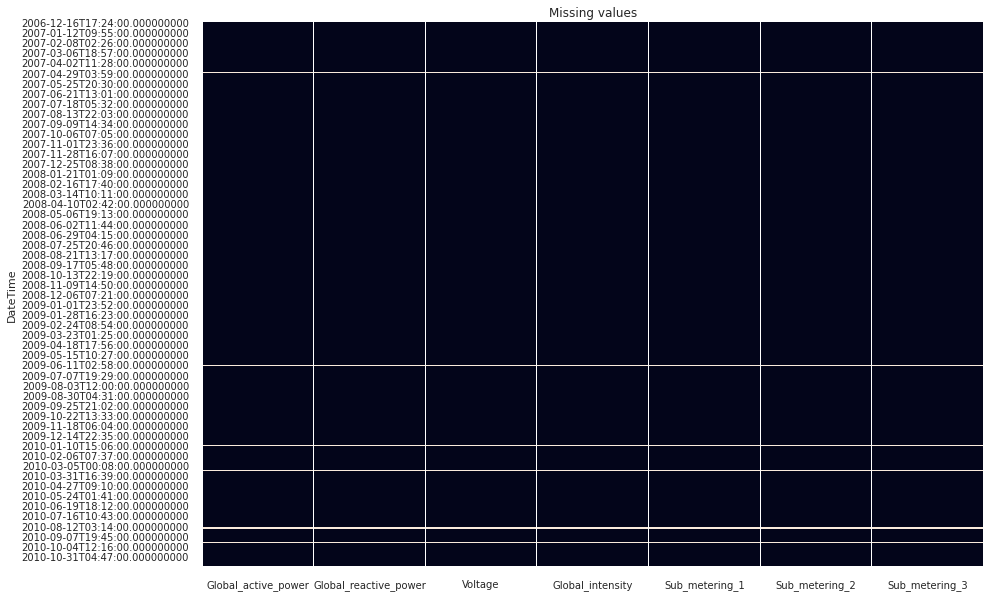

In [ ]:
#plot heatmap to observe missing values
plt.figure(figsize=(14, 10))
sns.heatmap(energy_df.isnull(), cbar=False).set_title('Missing values')

In [ ]:
#drop the rows which have missing values
energy_df = energy_df.dropna(axis=0, subset=['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

Text(0.5, 1.0, 'Cleaned Dataset')

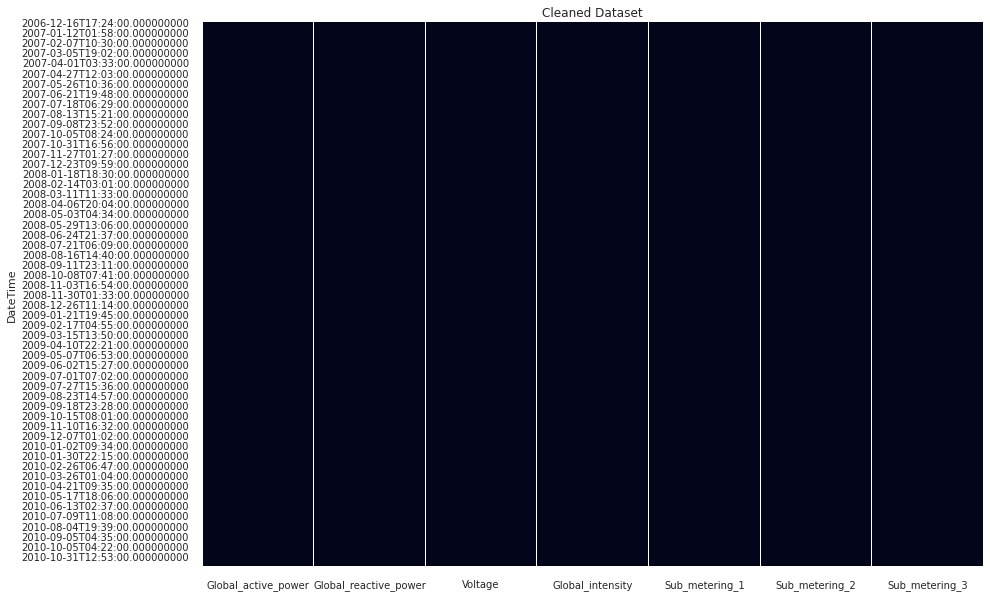

In [ ]:
#plot the heatmap to observe missing values
plt.figure(figsize=(14, 10))
sns.heatmap(energy_df.isnull(), cbar=False).set_title('Cleaned Dataset')

###**1.3.Pandas Profiling**

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
eda_report = pandas_profiling.ProfileReport(energy_df)
eda_report.to_file("Data_Analysis.html")

In [ ]:
from google.colab import files
files.download("Data_Analysis.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#pandas profiling report
pandas_profiling.ProfileReport(energy_df)

In [ ]:
#check if there are any 'nan'
energy_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
energy_df.describe()

Global_active_power  ...  Sub_metering_3
count         2.049280e+06  ...    2.049280e+06
mean          1.091615e+00  ...    6.458447e+00
std           1.057294e+00  ...    8.437154e+00
min           7.600000e-02  ...    0.000000e+00
25%           3.080000e-01  ...    0.000000e+00
50%           6.020000e-01  ...    1.000000e+00
75%           1.528000e+00  ...    1.700000e+01
max           1.112200e+01  ...    3.100000e+01

[8 rows x 7 columns]

## **2.Exploratory Data Analysis**

**Resample over day, and show the sum and mean of 'Global_active_power'. It is seen that mean and sum of resampled data set, have similar structure**

###**2.1.Data Resampling**

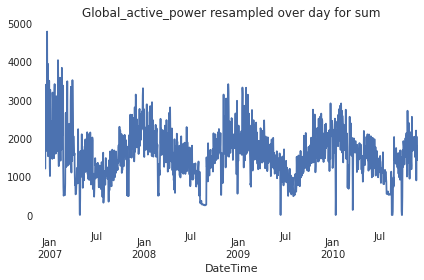

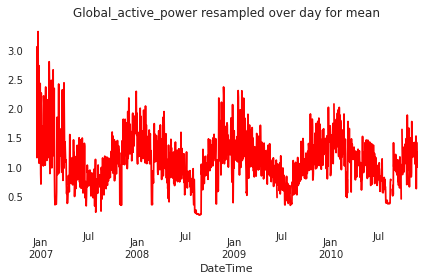

In [ ]:
energy_df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

energy_df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

**Mean and std of 'Global_intensity' resampled over day. It is seen that mean and sum of resampled data set, have similar structure.**



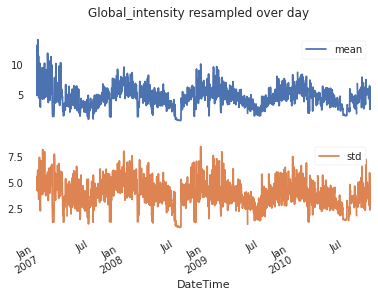

In [ ]:
energy_df.Global_intensity.resample('D').agg(['mean', 'std']).plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

**Mean and std of 'Global_reactive_power' resampled over day**

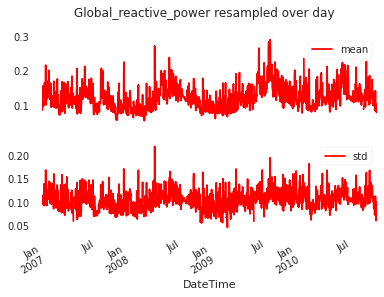

In [ ]:
energy_df.Global_reactive_power.resample('D').agg(['mean', 'std']).plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

**Sum of 'Global_active_power' resampled over month**

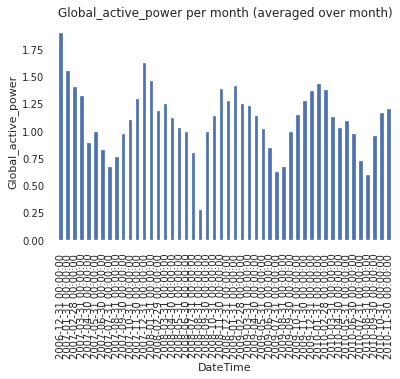

In [ ]:
energy_df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

**Mean of 'Global_active_power' resampled over quarter**

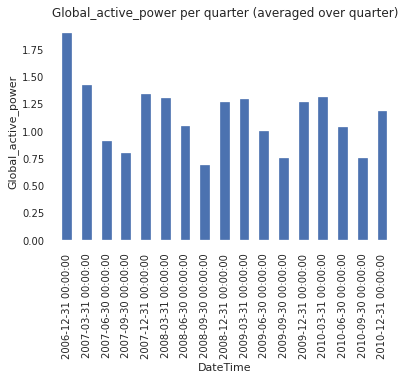

In [ ]:
energy_df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

**Mean of 'Voltage' resampled over month**

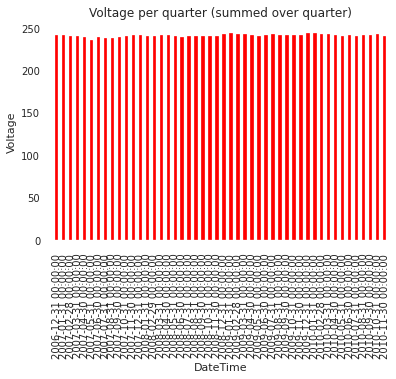

In [ ]:
energy_df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

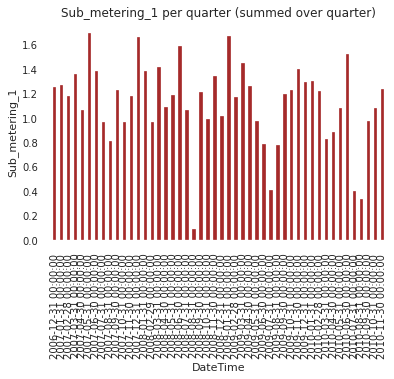

In [ ]:
energy_df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()


**Comparison of the mean of different features resampled over day. It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.**

###**2.2.Data Comparison**

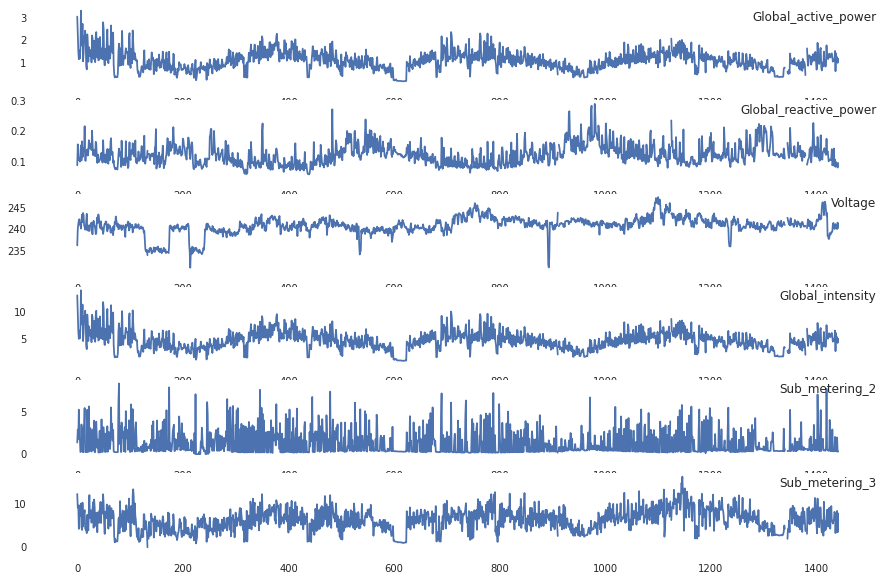

In [ ]:
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
values = energy_df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in cols:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(energy_df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()


**Resampling over week and computing mean**

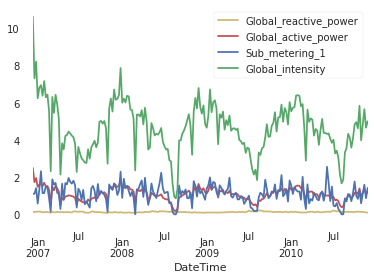

In [ ]:
energy_df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
energy_df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
energy_df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
energy_df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

**Histogram of the mean of different feature resampled over month**

###**2.3.Histogram and Co-relations**

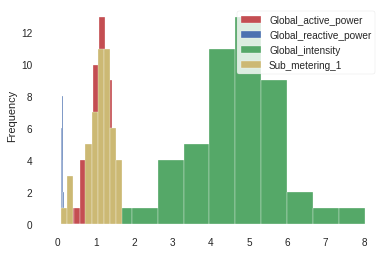

In [ ]:
energy_df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
energy_df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
energy_df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
energy_df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.style.use('seaborn-whitegrid')
plt.show()


**Correlations between 'Global_intensity' and 'Global_active_power'**

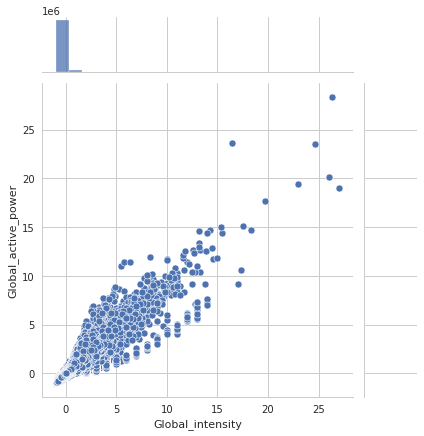

In [ ]:
data_returns = energy_df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  
sns.set_theme()
plt.show()

**Correlations between 'Voltage' and  'Global_active_power'**

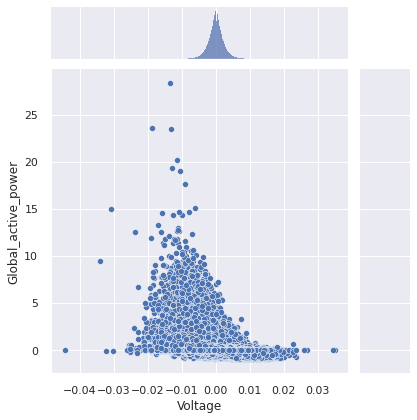

In [ ]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  
plt.show()

**From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.**

##**3.Correlations among features**

###**3.1.Corelations among other attributes without resampling**

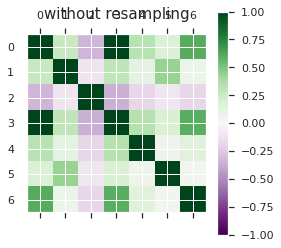

In [ ]:
# Correlations among columns
plt.matshow(energy_df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

###**3.2.Correlations of mean of resampled features**

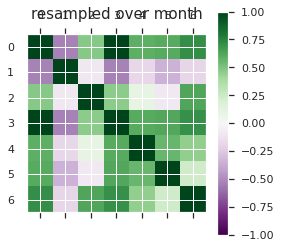

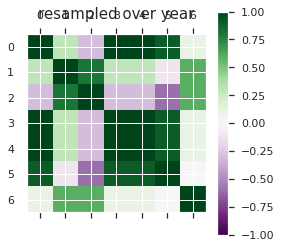

In [ ]:

# Correlations of mean of features resampled over months


plt.matshow(energy_df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(energy_df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

**It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature engineering.**

##**4.Machine-Learning: LSTM Data Preparation and feature engineering**

**I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.**

**I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.**

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

**In order to reduce the computation time, and also get a quick result to test the model. One can resmaple the data over hour (the original data are given in minutes). This will reduce the size of data from 2075259 to 34589 but keep the overall strucure of data as shown in the above.**

In [ ]:
## resampling of data over hour
df_resample = energy_df.resample('h').mean() 
df_resample.shape

(34589, 7)

**Note: I scale all features in range of [0,1]**

In [ ]:
## If you would like to train based on the resampled data (over hour), then used below
from sklearn.preprocessing import MinMaxScaler
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var6(t-1)  var7(t-1)   var1(t)
1   0.636816   0.295738   0.337945  ...   0.011366   0.782418  0.545045
2   0.545045   0.103358   0.335501  ...   0.144652   0.782676  0.509006
3   0.509006   0.110073   0.283802  ...   0.030869   0.774169  0.488550
4   0.488550   0.096987   0.315987  ...   0.000000   0.778809  0.455597
5   0.455597   0.099010   0.434417  ...   0.008973   0.798917  0.322555

[5 rows x 8 columns]


**Above I showed 7 input variables (input series) and the 1 output variable for 'Global_active_power' at the current time in hour (depending on resampling).**

###**4.1.Splitting the data to train and validation sets**

**First, I split the prepared dataset into train and test sets. To speed up the training of the model we will only train the model on the first year of data, then evaluate it on the next 3 years of data**

In [ ]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 7) (8760,) (25399, 1, 7) (25399,)


###**4.2.Model architecture**

1) **LSTM with 100 neurons in the first visible layer**   
2) **dropout 20%**   
3) **1 neuron in the output layer for predicting Global_active_power.**   
4) **The input shape will be 1 time step with 7 features.**   
5) **I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.**      
6) **The model will be fit for 20 training epochs with a batch size of 70.**  

Epoch 1/20
126/126 - 1s - loss: 0.0204 - val_loss: 0.0123
Epoch 2/20
126/126 - 1s - loss: 0.0130 - val_loss: 0.0110
Epoch 3/20
126/126 - 1s - loss: 0.0117 - val_loss: 0.0100
Epoch 4/20
126/126 - 1s - loss: 0.0110 - val_loss: 0.0094
Epoch 5/20
126/126 - 1s - loss: 0.0108 - val_loss: 0.0094
Epoch 6/20
126/126 - 1s - loss: 0.0107 - val_loss: 0.0093
Epoch 7/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 8/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 9/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 10/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 11/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 12/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 13/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0093
Epoch 14/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0093
Epoch 15/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 16/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092
Epoch 17/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0092
Epoch 

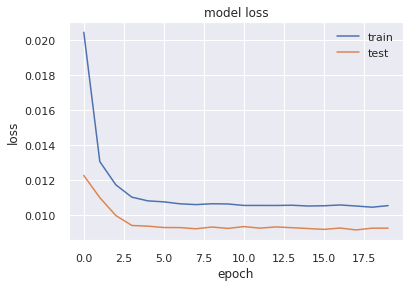

Test RMSE: 0.619


In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

##**5.Summary**

**Dataset**: This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).   

**Why should we care?**   
Millions of our every second consume electricity in one or the other form. Be it a gadget or a heavy equipment machine, we all use it un-neccessarly sometimes and cause more power consumption. It is important to analyze and make our resourses used efficiently.   

**Interesting Insights**  

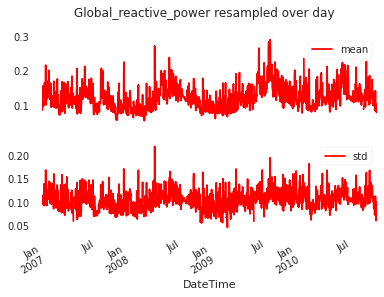

* * Comparison of the mean of different features resampled over day. It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.   

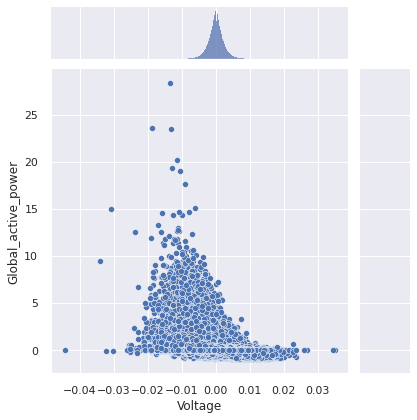   

* From above two plots it is seen that 'Global_intensity' and 'Global_active_power' correlated. But 'Voltage', 'Global_active_power' are less correlated. This is important observation for machine learning purpose.    

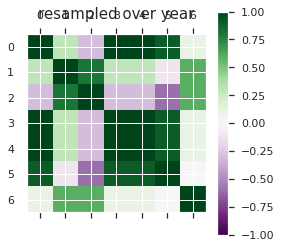   

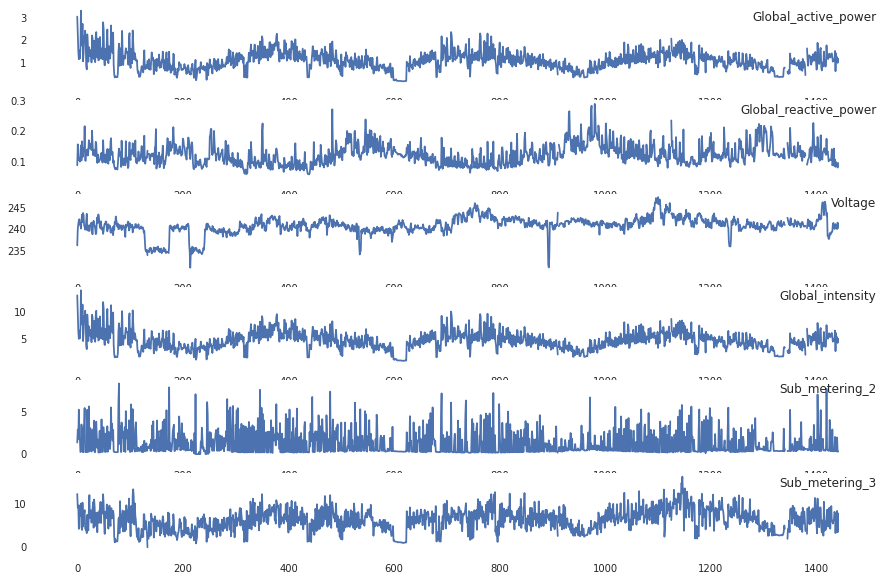

* It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature engineering.  

* Youtube video explaining things.


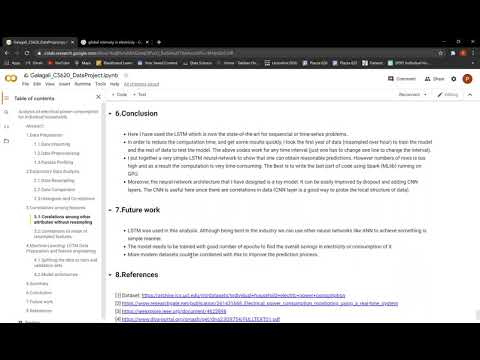

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('guoihmMg0Qc')

##**6.Conclusion**


* Here I have used the LSTM which is now the state-of-the-art for sequencial or time-series problems.
* In order to reduce the computation time, and get some results quickly, I took the first year of data (resampled over hour) to train the model and the rest of data to test the model. The above codes work for any time interval (just one has to change one line to change the interval).
* I put together a very simple LSTM neural-network to show that one can obtain reasonable predictions. However numbers of rows is too high and as a result the computation is very time-consuming. The Best is to write the last part of code using Spark (MLlib) running on GPU.
* Moreover, the neural-network architecture that I have designed is a toy model. It can be easily improved by dropout and adding CNN layers. The CNN is useful here since there are correlations in data (CNN layer is a good way to probe the local structure of data).

##**7.Future work**



*   LSTM was used in this analysis. Although being best in the industry we can use other neural networks like ANN to achieve something is simple manner.
*   The model needs to be trained with good number of epochs to find the overall savings in electricity or consumption of it.
* More modern datasets could be combined with this to improve the prediction process.



##**8.References**

[1] Dataset:  https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption   
[2] https://www.researchgate.net/publication/261431668_Electrical_power_consumption_monitoring_using_a_real-time_system   
[3] https://ieeexplore.ieee.org/document/4622898   
[4] https://www.diva-portal.org/smash/get/diva2:829754/FULLTEXT01.pdf   
[5] https://www.semanticscholar.org/paper/Power-Consumption-Monitoring-System-using-IOT-Bharathi-Madhushree/457641e5a0d19eb70493b63db956515187a25893   